In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [69]:
data = [
    {
        'model': 'random',
        'checkpoint': 'Baseline',
        'r1': 15.16,
        'r2': 1.78,
        'r3': 11.27
    },
    {
        'model': 'LEAD',
        'checkpoint': 'Baseline',
        'r1': 16.3,
        'r2': 1.6,
        'r3': 11.95
    },
    {
        'model': 'T-CONVS2S',
        'checkpoint': 'Baseline',
        'r1': 31.89,
        'r2': 11.54,
        'r3': 25.75
    },
    {
        'model': 'PaLM 2-L',
        'checkpoint': 'Baseline',
        'r1': 0,
        'r2': 23.2,
        'r3': 0
    },
    {
        'model': 'T5-base',
        'checkpoint': 'Off-the-shelf',
        'r1': 19.62,
        'r2': 3.14,
        'r3': 13.47
    },
    {
        'model': 'T5-base',
        'checkpoint': 'SFT',
        'r1': 31.8,
        'r2': 11,
        'r3': 24.02
    },
    {
        'model': 'GPT-2-medium',
        'checkpoint': 'Off-the-shelf',
        'r1': 1.2,
        'r2': 0.01,
        'r3': 1.3
    },
    {
        'model': 'GPT-2-medium',
        'checkpoint': 'SFT',
        'r1': 32.6,
        'r2': 11.84,
        'r3': 26.22
    },
    {
        'model': 'GPT-2-medium',
        'checkpoint': 'RLAIF',
        'r1': 30,
        'r2': 9.8,
        'r3': 23.8
    },
]

df = pd.DataFrame.from_dict(data)
df


,model,checkpoint,r1,r2,r3
0,random,Baseline,15.16,1.78,11.27
1,LEAD,Baseline,16.30,1.60,11.95
2,T-CONVS2S,Baseline,31.89,11.54,25.75
3,PaLM 2-L,Baseline,0.00,23.20,0.00
4,T5-base,Off-the-shelf,19.62,3.14,13.47
5,T5-base,SFT,31.80,11.00,24.02
6,GPT-2-medium,Off-the-shelf,1.20,0.01,1.30
7,GPT-2-medium,SFT,32.60,11.84,26.22
8,GPT-2-medium,RLAIF,30.00,9.80,23.80


In [70]:
df_long = pd.wide_to_long(df, stubnames='r', i=['model', 'checkpoint'], j='ROUGE_type').reset_index()
df_long['ROUGE_type'] = df_long['ROUGE_type'].astype('str')
df_long['ROUGE_type'] = df_long['ROUGE_type'].replace({'3': 'L'})
df_long


,model,checkpoint,ROUGE_type,r
0,random,Baseline,1,15.16
1,random,Baseline,2,1.78
2,random,Baseline,L,11.27
3,LEAD,Baseline,1,16.30
4,LEAD,Baseline,2,1.60
5,LEAD,Baseline,L,11.95
6,T-CONVS2S,Baseline,1,31.89
7,T-CONVS2S,Baseline,2,11.54
8,T-CONVS2S,Baseline,L,25.75
9,PaLM 2-L,Baseline,1,0.00


In [71]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

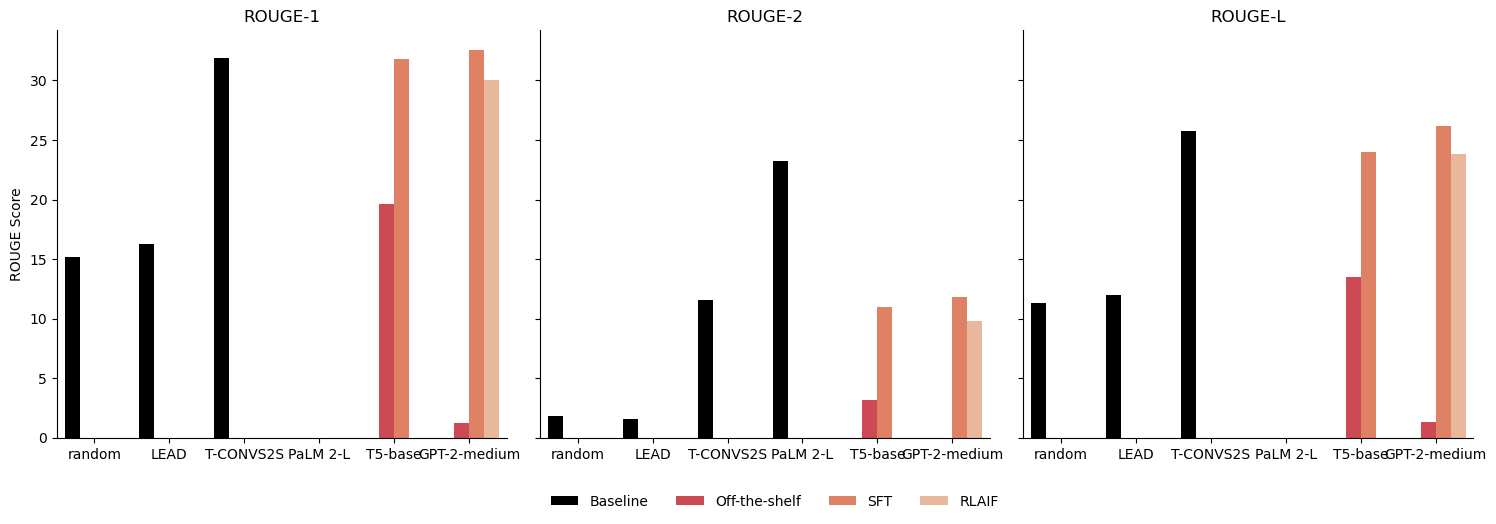

In [72]:
colours = ['black', "#e13442", "#f37650", "#f6b48f"]
palette = sns.color_palette(colours, 4)
g = sns.catplot(
    df_long,
    kind='bar',
    col='ROUGE_type',
    x='model',
    y='r',
    hue='checkpoint',
    palette = palette,
    # legend=False
    # palette=sns.color_palette("rocket")
    # palette=sns.color_palette("Reds")
)

for ax, title in zip(g.axes.flatten(), ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']):
    ax.set_title(title)
    
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.48, -0.05), ncol=4, title=None, frameon=False,
)
# plt.legend(loc='upper left')

g.set_axis_labels(x_var="", y_var="ROUGE Score")
# plt.legend(loc='lower center', ncol=4)
g

/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

<Axes: ylabel='ROUGE-2'>

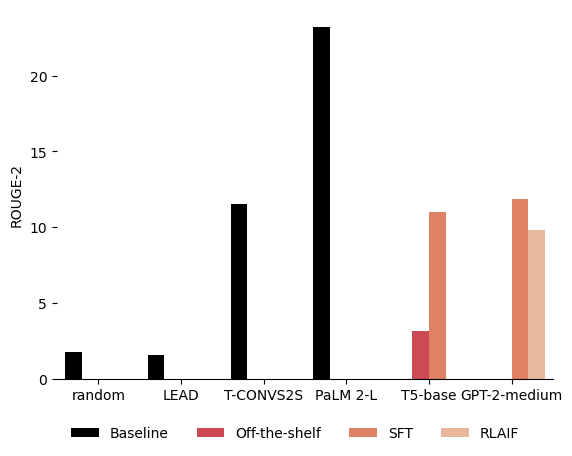

In [74]:
colours = ['black', "#e13442", "#f37650", "#f6b48f"]
palette = sns.color_palette(colours, 4)
df_long_subset = df_long.loc[df_long['ROUGE_type'] == "2", :]
f = sns.barplot(
    df_long_subset,
    x='model',
    y='r',
    hue='checkpoint',
    palette = palette,
)

sns.move_legend(
    f, "lower center",
    bbox_to_anchor=(.48, -0.2), ncol=4, title=None, frameon=False,
)

f.set(xlabel='', ylabel='ROUGE-2')
sns.despine(bottom = False, left = True)
f